In [2]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


<h2>Title: Boston Housing Data</h2>
<p><strong>Sources:</strong></p>
<ul>
  <li>(a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.</li>
  <li>(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.</li>
  <li>(c) Date: July 7, 1993</li>
</ul>
<p><strong>Past Usage:</strong></p>
<ul>
  <li>Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261.</li>
  <li>Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.</li>
</ul>
<p><strong>Relevant Information:</strong></p>
<p>Concerns housing values in suburbs of Boston.</p>
<p><strong>Number of Instances:</strong> 506</p>
<p><strong>Number of Attributes:</strong> 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.</p>
<p><strong>Attribute Information:</strong></p>
<ol>
  <li><strong>CRIM:</strong> per capita crime rate by town</li>
  <li><strong>ZN:</strong> proportion of residential land zoned for lots over 25,000 sq.ft.</li>
  <li><strong>INDUS:</strong> proportion of non-retail business acres per town</li>
  <li><strong>CHAS:</strong> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
  <li><strong>NOX:</strong> nitric oxides concentration (parts per 10 million)</li>
  <li><strong>RM:</strong> average number of rooms per dwelling</li>
  <li><strong>AGE:</strong> proportion of owner-occupied units built prior to 1940</li>
  <li><strong>DIS:</strong> weighted distances to five Boston employment centres</li>
  <li><strong>RAD:</strong> index of accessibility to radial highways</li>
  <li><strong>TAX:</strong> full-value property-tax rate per 10,000</li>
  <li><strong>PTRATIO:</strong> pupil-teacher ratio by town</li>
  <li><strong>B:</strong> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
  <li><strong>LSTAT:</strong> % lower status of the population</li>
  <li><strong>MEDV:</strong> Median value of owner-occupied homes in $1000's</li>
</ol>
<p><strong>Missing Attribute Values:</strong> None.</p>

In [3]:
df = pd.read_csv('housing data.csv')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [5]:
df.shape

(505, 14)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

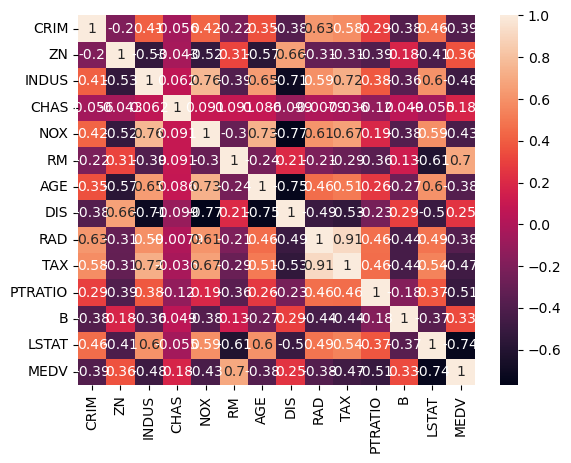

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True)

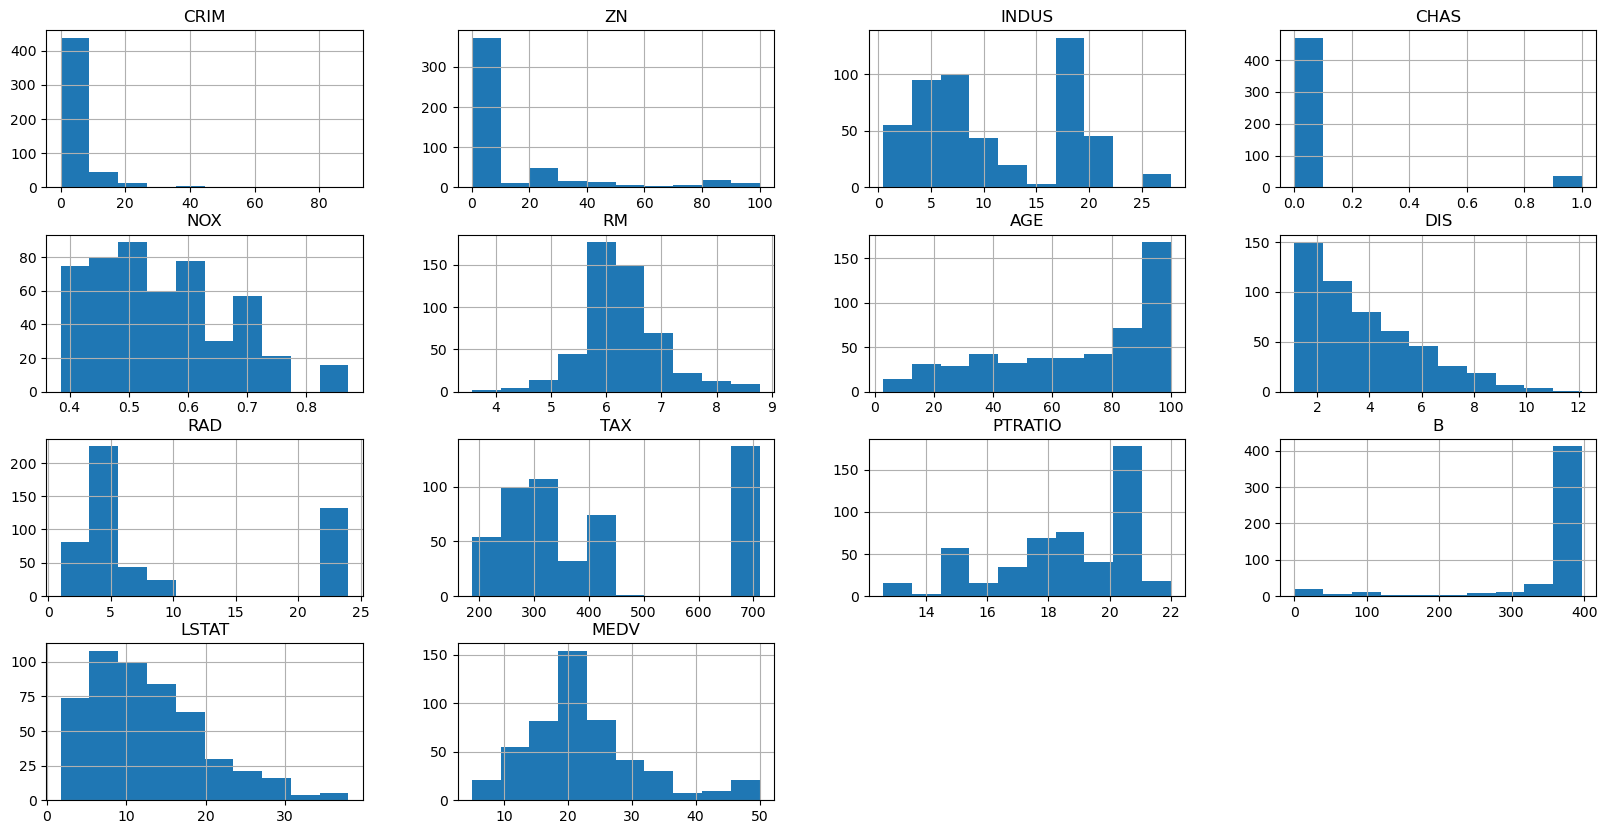

In [9]:
df.hist(figsize = (20, 10));


<Figure size 640x480 with 0 Axes>

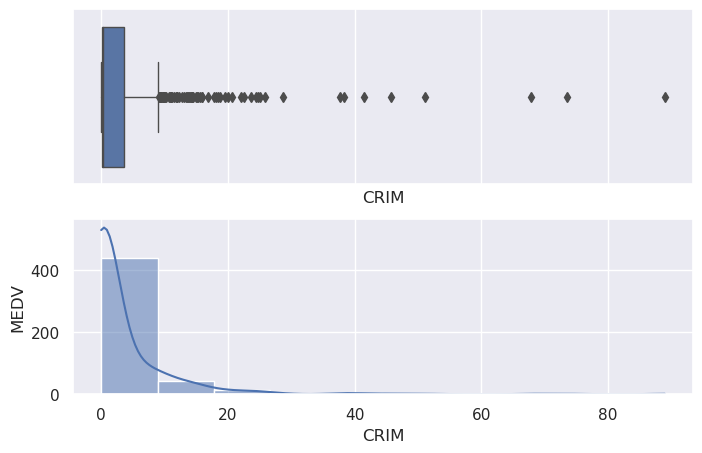

<Figure size 800x500 with 0 Axes>

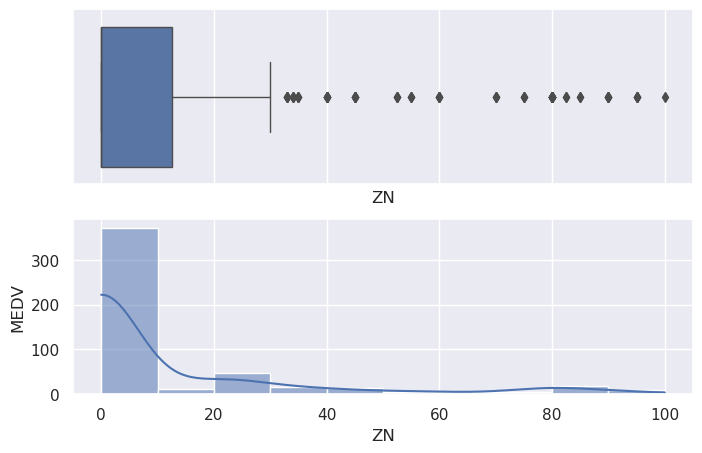

<Figure size 800x500 with 0 Axes>

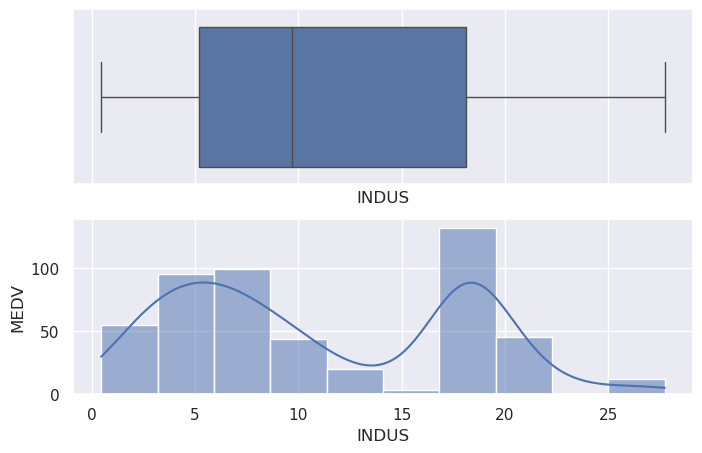

<Figure size 800x500 with 0 Axes>

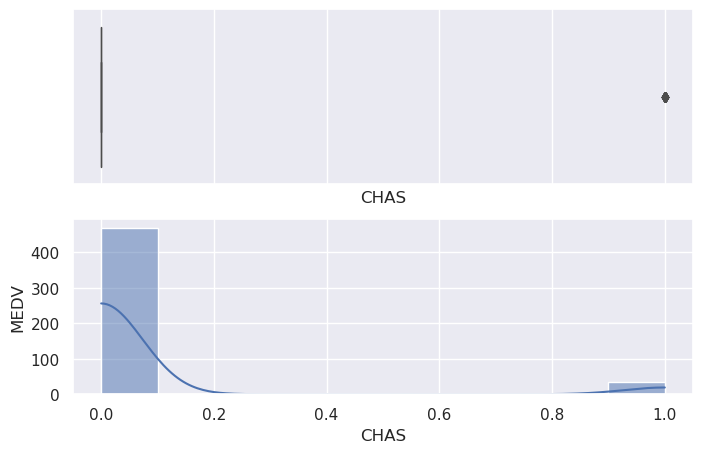

<Figure size 800x500 with 0 Axes>

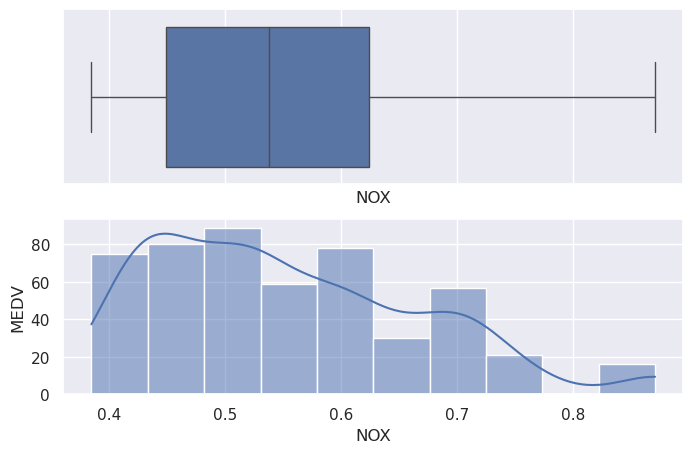

<Figure size 800x500 with 0 Axes>

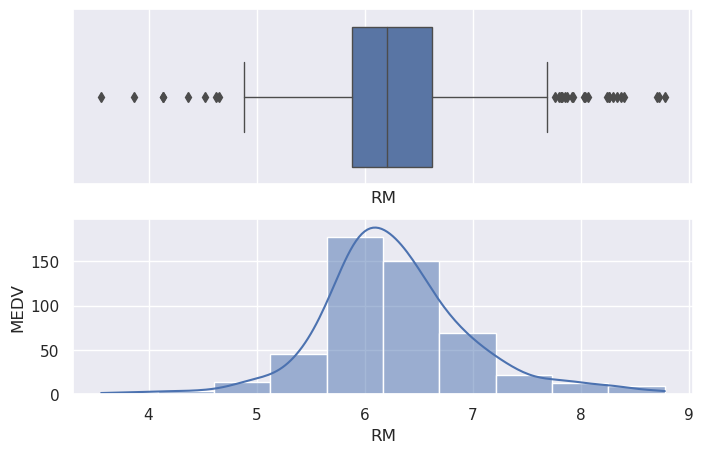

<Figure size 800x500 with 0 Axes>

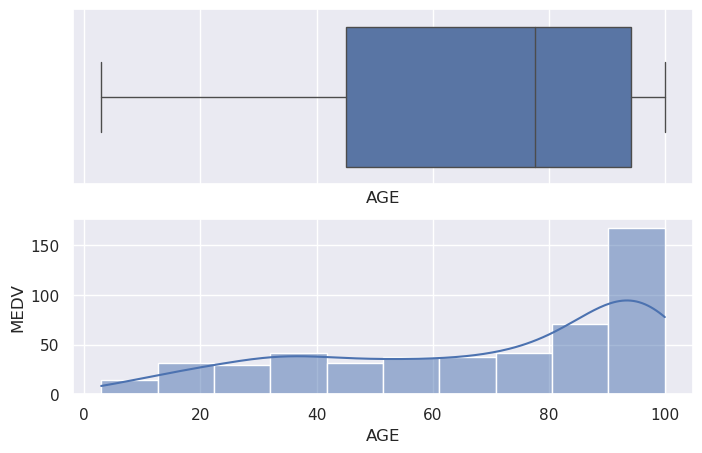

<Figure size 800x500 with 0 Axes>

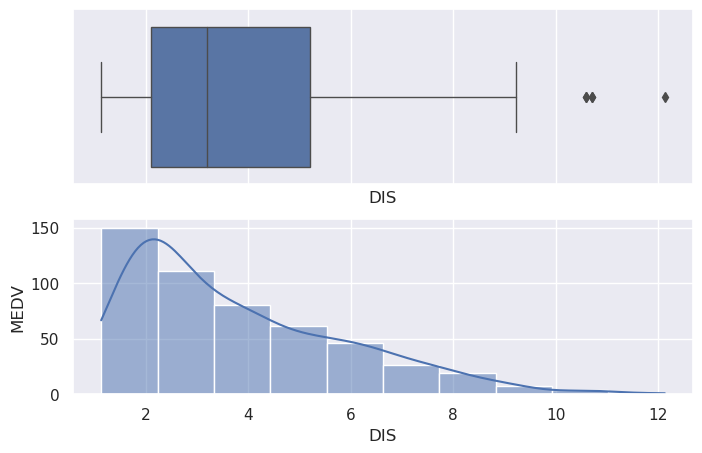

<Figure size 800x500 with 0 Axes>

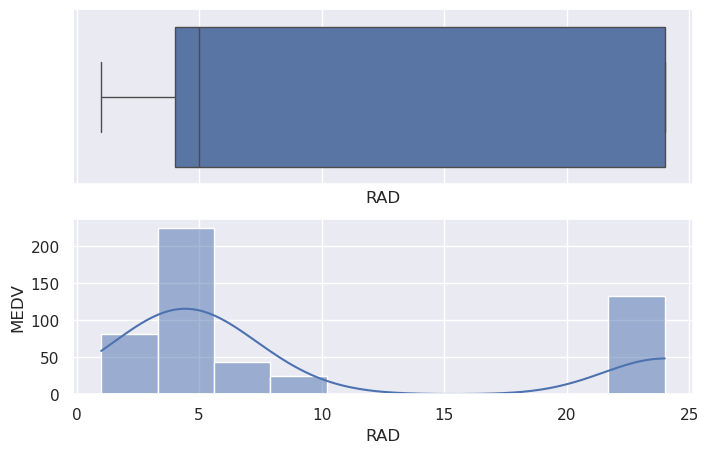

<Figure size 800x500 with 0 Axes>

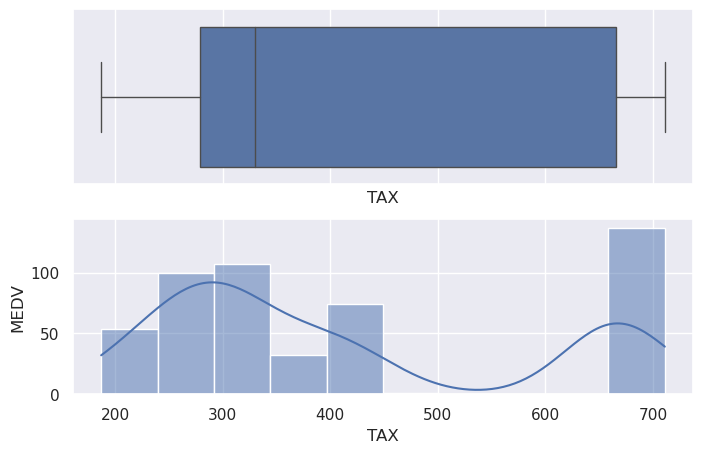

<Figure size 800x500 with 0 Axes>

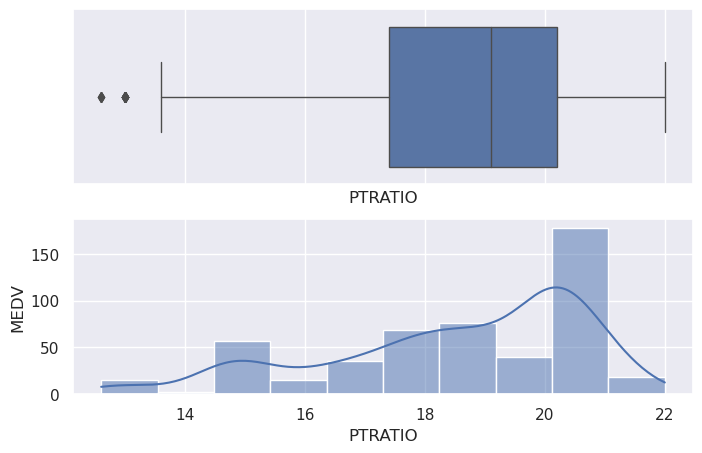

<Figure size 800x500 with 0 Axes>

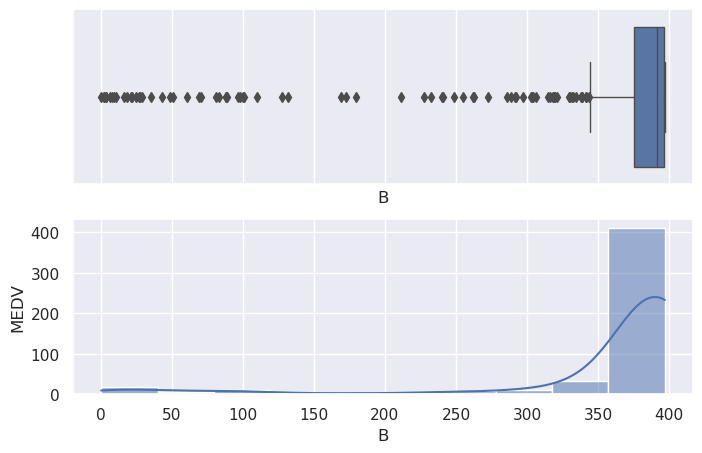

<Figure size 800x500 with 0 Axes>

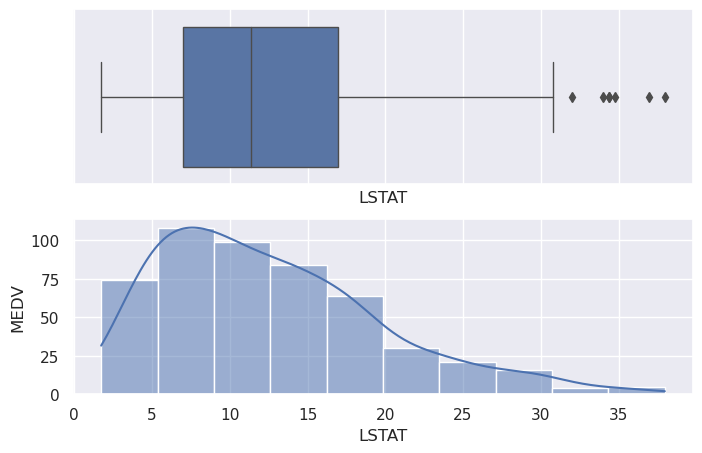

<Figure size 800x500 with 0 Axes>

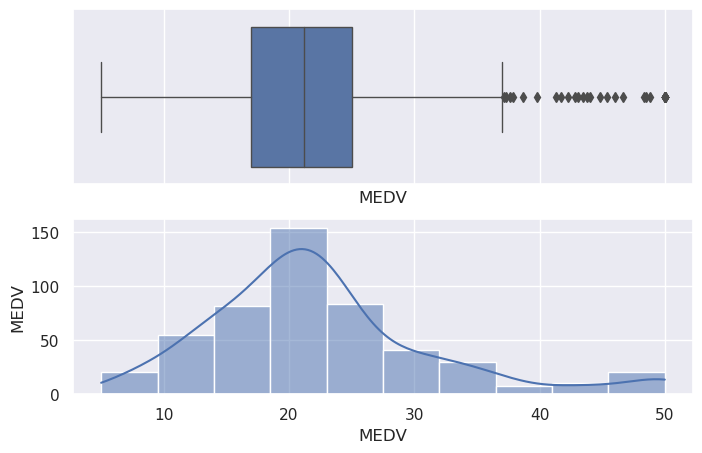

In [10]:
import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='MEDV')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [11]:
warnings.filterwarnings("ignore")
shapiro_test = stats.shapiro(df)
shapiro_test

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")


Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Podem rebutjar l'hipotesis nula


In [12]:

df.MEDV.value_counts()


50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
42.3     1
32.9     1
34.6     1
30.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

In [13]:
#Fem el train
train, test = train_test_split(df, test_size = 0.20, random_state=4)
print("Exemples usats per al Train: ", len(train))
print("Exemples usats per al Test: ", len(test))

test.describe().round(2)


Exemples usats per al Train:  404
Exemples usats per al Test:  101


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.00,101.0,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,4.02,12.4,11.64,0.08,0.56,6.28,69.19,3.75,9.26,411.35,18.32,344.51,13.59,21.96
std,10.05,25.3,7.17,0.27,0.12,0.67,29.18,2.15,8.63,167.14,2.31,103.92,7.30,9.21
min,0.01,0.0,0.74,0.00,0.39,4.37,6.20,1.33,1.00,188.00,13.00,6.68,2.88,5.00
25%,0.11,0.0,6.07,0.00,0.45,5.88,42.80,2.11,4.00,284.00,16.90,372.08,8.10,16.40
50%,0.34,0.0,9.90,0.00,0.54,6.17,80.80,2.90,5.00,345.00,18.90,390.94,13.35,20.40
75%,3.57,12.5,18.10,0.00,0.65,6.64,94.10,5.21,8.00,666.00,20.20,395.58,17.58,24.70
max,73.53,95.0,27.74,1.00,0.87,8.38,100.00,9.22,24.00,711.00,21.20,396.90,36.98,50.00


In [14]:
train.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.52,11.09,11.03,0.07,0.55,6.29,68.43,3.81,9.64,407.74,18.50,359.62,12.44,22.67
std,8.22,22.85,6.78,0.25,0.11,0.71,27.96,2.10,8.74,169.20,2.13,87.83,7.09,9.21
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.89,45.32,2.10,4.00,278.50,17.40,375.74,6.74,17.18
50%,0.25,0.00,9.69,0.00,0.54,6.21,76.70,3.30,5.00,330.00,19.10,391.77,10.80,21.40
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.02,5.14,24.00,666.00,20.20,396.35,16.53,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [15]:
#Estandarditzem el DF numèric amb standardscaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [17]:
estandarPD = pd.DataFrame(X_scaled)
estandarPD.rename(columns = {0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT', 13:'MEDV'}, inplace = True)
estandarPD.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,-5.089438e-17,5.265315e-16,1.145948e-16,6.705307e-17,-6.096334e-16,-9.442392e-17,2.265515e-16,3.963826e-16,-1.789987e-15,6.124914e-16,-1.487919e-15,-9.151096e-16,-2.770061e-17,1.596083e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-4.199521e-01,-4.867158e-01,-1.561416e+00,-2.728884e-01,-1.464748e+00,-3.876252e+00,-2.333399e+00,-1.265564e+00,-9.847578e-01,-1.314588e+00,-2.713313e+00,-3.903210e+00,-1.533499e+00,-1.906072e+00
25%,-4.114463e-01,-4.867158e-01,-8.708119e-01,-2.728884e-01,-9.124302e-01,-5.680576e-01,-8.377575e-01,-8.047127e-01,-6.398877e-01,-7.684741e-01,-4.914798e-01,2.052605e-01,-7.932643e-01,-6.012806e-01
50%,-3.908720e-01,-4.867158e-01,-2.137890e-01,-2.728884e-01,-1.443631e-01,-1.082699e-01,3.239401e-01,-2.826933e-01,-5.249310e-01,-4.657369e-01,2.954195e-01,3.816462e-01,-1.806084e-01,-1.446036e-01
75%,6.692229e-03,4.929144e-02,1.014114e+00,-2.728884e-01,5.978141e-01,4.853260e-01,9.065653e-01,6.731548e-01,1.659246e+00,1.528767e+00,8.045897e-01,4.340141e-01,6.016846e-01,2.685803e-01
max,9.925011e+00,3.801342e+00,2.421603e+00,3.664502e+00,2.729416e+00,3.552950e+00,1.116168e+00,3.956957e+00,1.659246e+00,1.795888e+00,1.637777e+00,4.415735e-01,3.547200e+00,2.986896e+00


<AxesSubplot:>

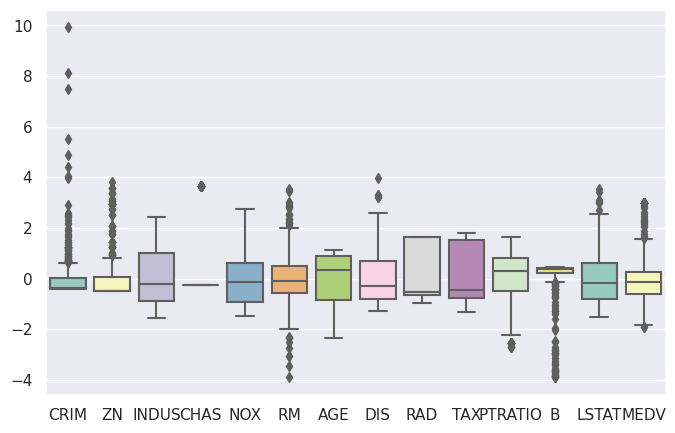

In [18]:
sns.boxplot(data=estandarPD, palette="Set3")